In [1]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 


In [9]:
df_main_data = pd.read_excel("Archive/cat_sum_inf_opt.xlsx")

,day,num_optimized,group,IC,Cst3,Cst6,Cst15,H,G,RN,...,$\beta$,$\gamma$,1/C_ve,c_F_R,$c_{F_D}$,R_ve,PC1,PC2,PC3,PC4
0,0,14,CTL-PROTECT,0.328,0.0308,0.0140,0.0041,95.95,18.46,0.29,...,0.4467,0.9733,367.2721,16.5763,4.1763,17.5232,36.137147,-24.078381,4.362711,1.687053
1,0,12,CTL-P20,0.344,0.0333,0.0162,0.0053,103.10,15.95,0.39,...,0.5074,0.9846,500.0000,15.2693,5.3927,19.2561,162.282900,17.827382,3.925514,-1.649578
2,0,9,ETX-PROTECT,0.274,0.0264,0.0121,0.0039,122.30,24.66,0.27,...,0.4715,0.9666,445.4722,16.5433,5.1324,30.6096,119.622237,-23.172704,-2.586531,0.562334
3,0,10,ETX-P20,0.278,0.0277,0.0128,0.0044,110.00,21.82,0.38,...,0.5031,0.9763,417.7392,15.8664,5.6984,29.4559,89.229590,-21.592626,-3.942709,-0.865290
4,7,8,CTL-PROTECT,0.562,0.0535,0.0284,0.0079,28.59,6.85,0.10,...,0.5497,0.9648,259.9372,14.9420,3.6095,6.9413,-88.934875,1.067938,-1.065631,0.097305


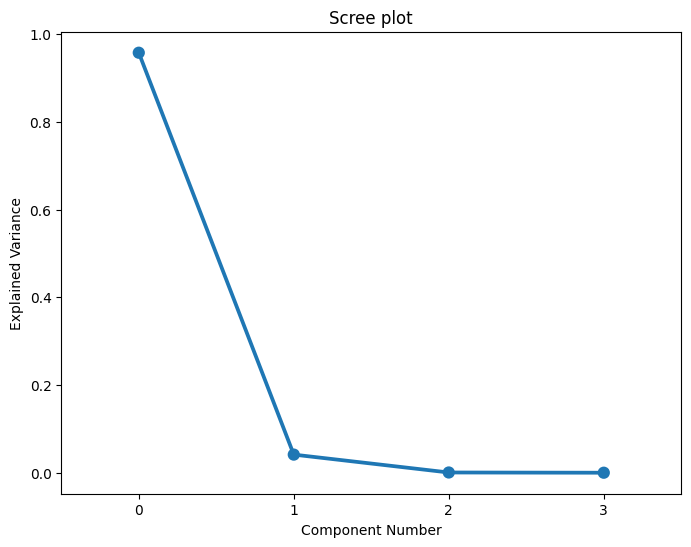

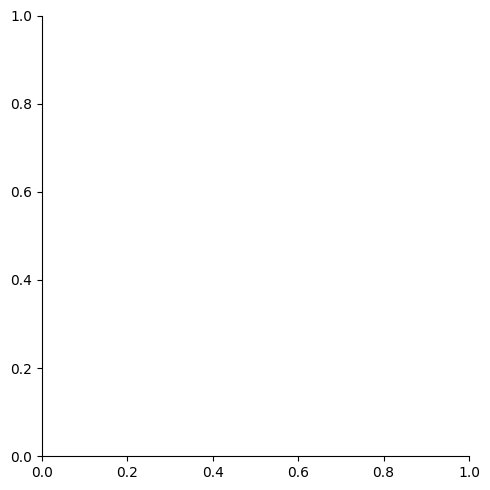

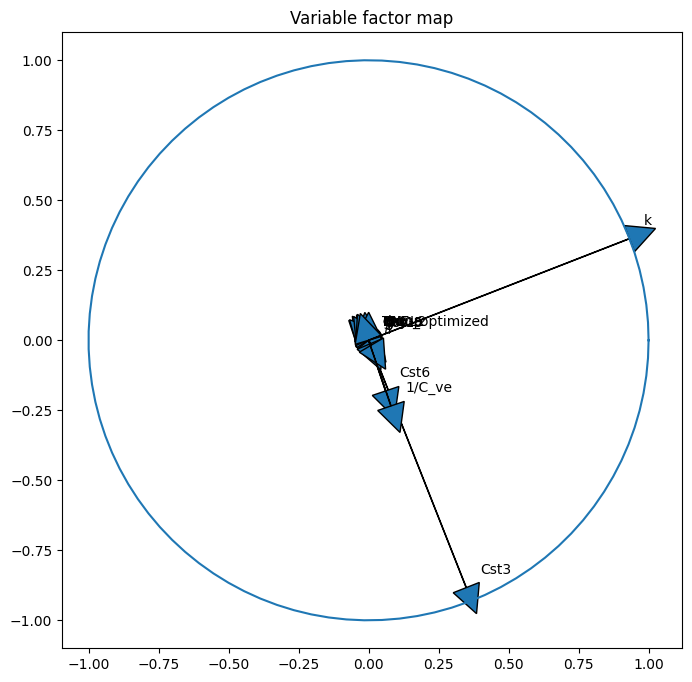

In [7]:

 
n_components = 4
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df.iloc[:,3:20])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot(data=df,
               fit_reg=False,
               scatter=True)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [38]:
df = pd.read_csv("Archive/coord.csv")

In [21]:
df.columns

Index(['vars', 'Dim1', 'Dim2'], dtype='object')

In [33]:
df.describe()

,Dim1,Dim2
count,17.000000,17.000000
mean,0.024347,0.235888
std,0.812667,0.421024
min,-0.939561,-0.878817
25%,-0.844027,0.063772
50%,0.328258,0.282337
75%,0.806580,0.464861
max,0.990685,0.824465


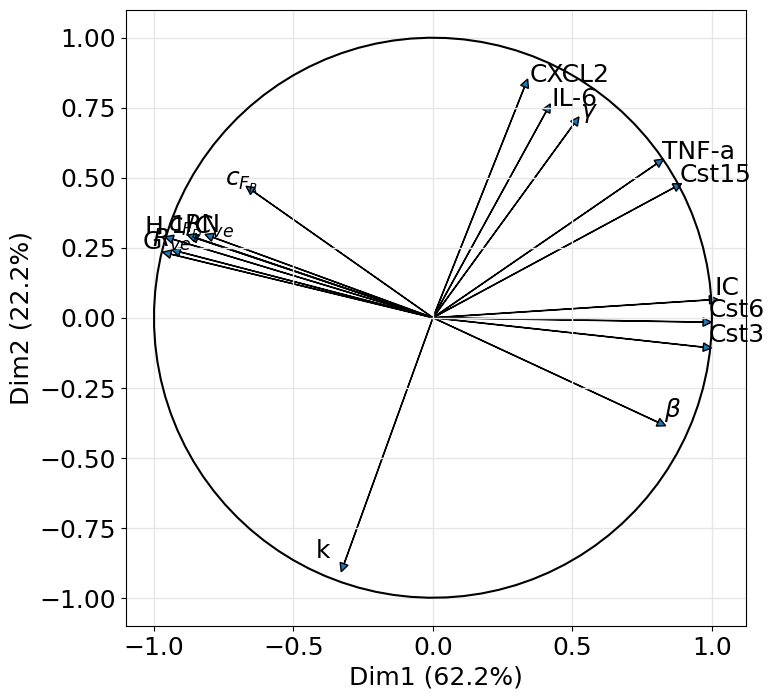

In [68]:
# Show the points in terms of the first two PCs
# g = sns.lmplot(x='Dim1', y='Dim2',
#                data=df,
#                fit_reg=False,
#                scatter=True)
plt.rcParams["font.family"] = "sans-serif"

plt.rcParams.update({'font.size': 18, 'font.style': 'normal'})
(fig, ax) = plt.subplots(figsize=(8, 8))
plt.grid(color=[0.9,0.9,0.9], linestyle='-', linewidth=1)
for i in range(0, 17):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             df.iloc[i, 1],  #0 for PC1
             df.iloc[i, 2],  #1 for PC2
             head_width=0.03,
             head_length=0.03)
    if df.iloc[i, 1] > 0:

        plt.text(df.iloc[i,1] + 0.02,
                df.iloc[i,2] + 0.02,
                df.iloc[i,0])
    else:
        plt.text(df.iloc[i,1] - 0.1,
                df.iloc[i,2] + 0.02,
                df.iloc[i,0])


plt.xlabel('Dim1 (62.2%)')  
plt.ylabel('Dim2 (22.2%)')    

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), color='k')  # Add a unit circle for scale
plt.axis('equal')
plt.savefig("PCA.svg",format='svg')